In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm

In [4]:
data = np.genfromtxt('two_factory_data.txt', names=True)

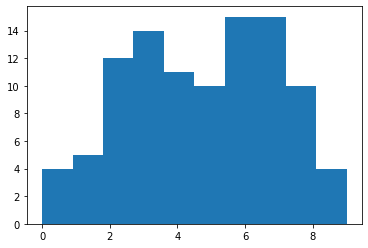

In [5]:
plt.hist(data['z'], bins=10);

In [6]:
k=2

with pm.Model() as model:
   
    #could use beta dist cause theres only 2 factories but practice
    w = pm.Dirichlet('weight', a=np.ones(k), shape=2, testval=[0.5,0.5]
                     
    omega = pm.Beta('omega', 2,2, shape=2, tesval=[0.2,0.6])
                     
    kappa = pm.Gamma('kappa', 1, .01, shape=2)
                     
    switch = pm.math.switch(omega[1]-omega[0]>0, -np.inf, 0)
    
    order_model_potential = pm.Potential('order_model_potential', switch)
                     
    factory = pm.Categorical('factory', p=w , shape=len(data))
                     
    theta = pm.Beta('theta', omega[factory]*kappa[facotry], (1-omega[factory])*kappa[factory], shape=len(data))
    
    y = pm.Binomial('y', n=data['N'], p=theta, observed=data['z'])

SyntaxError: invalid syntax (<ipython-input-6-bf418286625f>, line 8)